## Part I Building the SOM
## Import necessary libraries


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Import the dataset


In [16]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


## Feature Scaling


In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
x = sc.fit_transform(x)


## Training the SOM


In [18]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data=x)
som.train_random(data=x, num_iteration=100)


## Visualizing the results


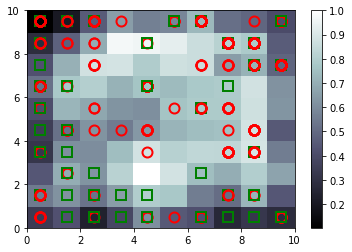

In [19]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)  # take the transpose
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, ctm in enumerate(x):
    w = som.winner(ctm)
    plot(w[0] + 0.5, w[1] + 0.5,
         markers[y[i]], markeredgecolor=colors[y[i]], markerfacecolor='None', markersize=10, markeredgewidth=2)
    

## Find the frauds

In [20]:
mapping = som.win_map(x)
frauds = np.concatenate((mapping[(9,7)], mapping[(4, 9)]), axis=0)


ValueError: all the input arrays must have same number of dimensions

# Part II Wrap ANN
## Create matrix of features

In [ ]:
customers = dataset.iloc[:, 1:].values